<a href="https://colab.research.google.com/github/ErikaDenisse29/ColabFiles/blob/main/Actividad_5_Ejercicio_de_preprocesamiento_y_normalizaci%C3%B3n_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 59.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


SCRIPT DE ANÁLISIS DE TWEETS - CAMBIO CLIMÁTICO
 Técnicas: Preprocesamiento, Normalización, Visualización
INICIANDO ANÁLISIS DE TWEETS SOBRE CAMBIO CLIMÁTICO
Dataset cargado: 500 tweets
Columnas disponibles: ['tuit']
Total de tweets: 500
Texto completo: 37653 caracteres

 PROCESANDO TEXTO...
 Texto preprocesado y limpiado
 Texto tokenizado: 2307 tokens iniciales
Palabras relevantes: 2307 tokens
Reducción: 0.0%

GENERANDO VISUALIZACIONES...


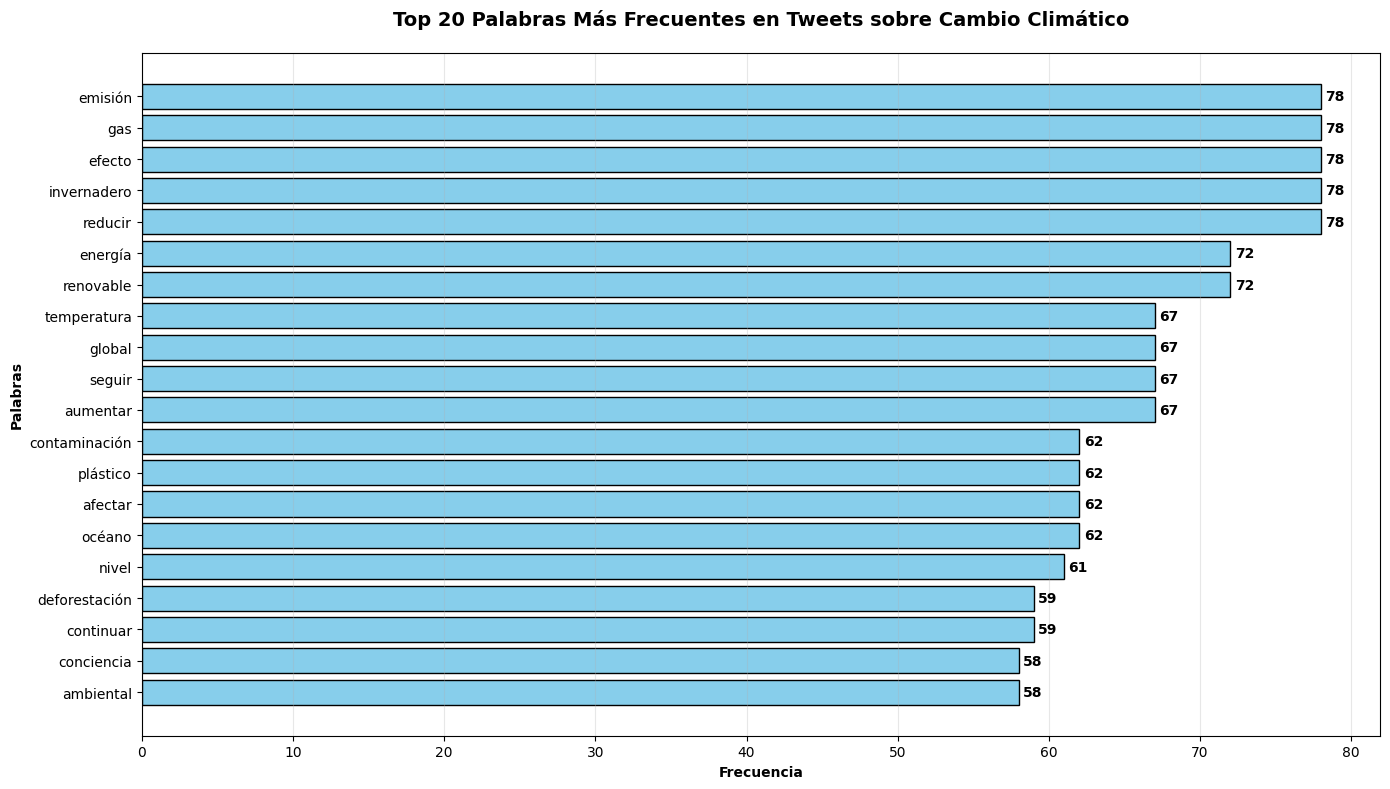

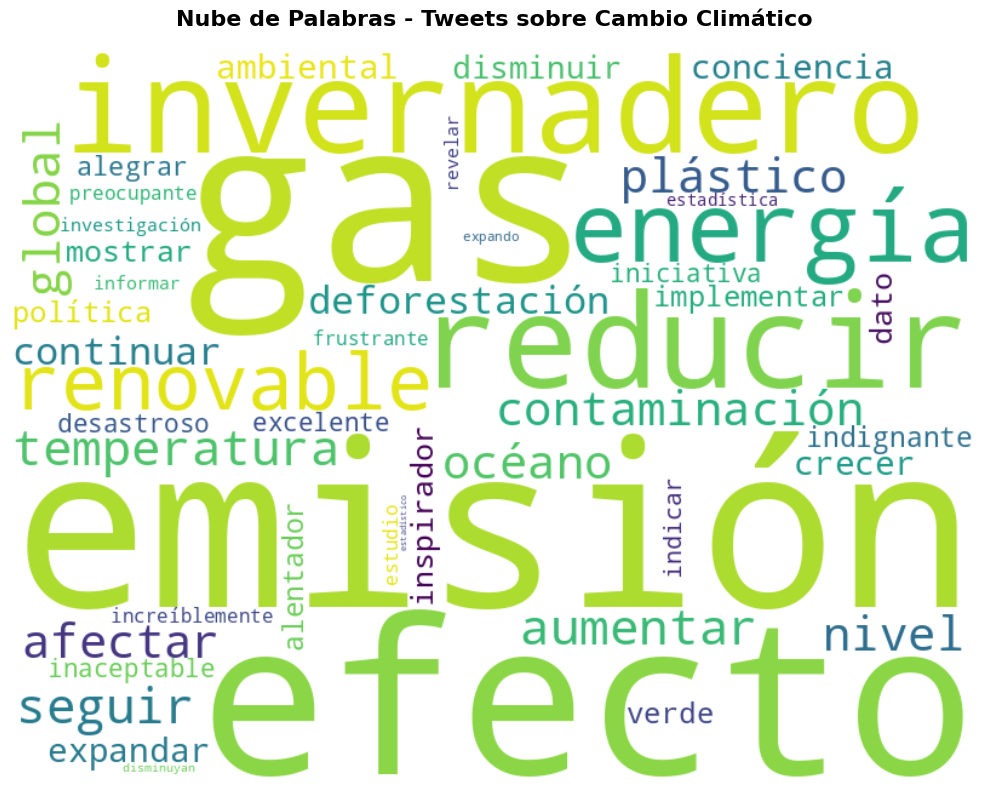


 ESTADÍSTICAS FINALES:
Total de tweets analizados: 500
Palabras únicas relevantes: 48
Palabra más frecuente: 'emisión' (78 veces)
Rango de frecuencias: 5 - 78 ocurrencias

ANÁLISIS COMPLETADO EXITOSAMENTE
 Las visualizaciones muestran las palabras más relevantes
 Se eliminaron palabras vacías y elementos sin significado


In [5]:

import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import spacy

try:
    nlp = spacy.load("es_core_news_sm")
except:
    print("Modelo spaCy no encontrado.")
    nlp = None

def cargar_tweets(archivo_path):

    try:
        df = pd.read_csv('drive/MyDrive/tuits_cambio_climatico.csv')
        print(f"Dataset cargado: {len(df)} tweets")
        print(f"Columnas disponibles: {list(df.columns)}")

        if 'tuit' not in df.columns:
            print("Error: No se encontró la columna 'tuit'")
            print("Columnas disponibles:", list(df.columns))
            return None

        tweets = df['tuit'].dropna().astype(str).tolist()
        texto_completo = ' '.join(tweets)

        print(f"Total de tweets: {len(tweets)}")
        print(f"Texto completo: {len(texto_completo)} caracteres")

        return texto_completo, df

    except FileNotFoundError:
        print(f"Error: Archivo '{archivo_path}' no encontrado")
        return None, None
    except Exception as e:
        print(f" Error al cargar el archivo: {e}")
        return None, None

def preprocesar_texto(texto):

    texto = texto.lower()
    texto = re.sub(r'https?://\S+', '', texto)
    texto = re.sub(r'@\w+', '', texto)
    texto = re.sub(r'#\w+', '', texto)
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^\w\sáéíóúñ]', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

def eliminar_palabras_vacias(tokens):

    palabras_vacias = {
        'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
        'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este',
        'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta',
        'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni',
        'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos',
        'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho',
        'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo',
        'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros',
        'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo',
        'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra',
        'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis',
        'están', 'esté', 'estés', 'estemos', 'estéis', 'estén', 'estaba', 'estabas', 'estábamos',
        'estabais', 'estaban', 'estuve', 'estuviste', 'estuvo', 'estuvimos', 'estuvisteis',
        'estuvieron', 'estuviera', 'estuvieras', 'estuviéramos', 'estuvierais', 'estuvieran',
        'estuviese', 'estuvieses', 'estuviésemos', 'estuvieseis', 'estuviesen', 'estando',
        'estado', 'estada', 'estados', 'estadas', 'estad', 'ser', 'soy', 'eres', 'es', 'somos',
        'sois', 'son', 'sea', 'seas', 'seamos', 'seáis', 'sean', 'era', 'eras', 'éramos', 'erais',
        'eran', 'fui', 'fuiste', 'fue', 'fuimos', 'fuisteis', 'fueron', 'fuera', 'fueras',
        'fuéramos', 'fuerais', 'fueran', 'fuese', 'fueses', 'fuésemos', 'fueseis', 'fuesen',
        'siento', 'sentiste', 'sintió', 'sentimos', 'sentisteis', 'sintieron', 'sintiera',
        'sintieras', 'sintiéramos', 'sintierais', 'sintieran', 'sintiese', 'sintieses',
        'sintiésemos', 'sintieseis', 'sintiesen', 'sentido', 'teniendo', 'tenido', 'tenida',
        'tenidos', 'tenidas', 'tengo', 'tienes', 'tiene', 'tenemos', 'tenéis', 'tienen',
        'tenga', 'tengas', 'tengamos', 'tengáis', 'tengan', 'tenía', 'tenías', 'teníamos',
        'teníais', 'tenían', 'tuve', 'tuviste', 'tuvo', 'tuvimos', 'tuvisteis', 'tuvieron',
        'tuviera', 'tuvieras', 'tuviéramos', 'tuvierais', 'tuvieran', 'tuviese', 'tuvieses',
        'tuviésemos', 'tuvieseis', 'tuviesen', 'teniendo', 'tenido', 'tenida', 'tenidos',
        'tenidas', 'tened', 'rt', 'q', 'x', 'd', 't', 'via', 'si', 'así', 'sino', 'sólo', 'tan'
    }

    tokens_relevantes = [
        token for token in tokens
        if token not in palabras_vacias and len(token) > 2
    ]

    return tokens_relevantes

def normalizar_y_tokenizar(texto):

    if nlp:
        doc = nlp(texto)
        tokens = [
            token.lemma_.lower() for token in doc
            if not token.is_stop and not token.is_punct and token.is_alpha and len(token.lemma_) > 2
        ]
    else:
        tokens = texto.split()
        tokens = [token for token in tokens if len(token) > 2]

    return tokens

def generar_grafica_barras(palabras_frecuentes, top_n=20):

    plt.figure(figsize=(14, 8))
    palabras = [item[0] for item in palabras_frecuentes[:top_n]]
    frecuencias = [item[1] for item in palabras_frecuentes[:top_n]]
    bars = plt.barh(palabras, frecuencias, color='skyblue', edgecolor='black')


    for bar, frecuencia in zip(bars, frecuencias):
        plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                f'{frecuencia}', ha='left', va='center', fontweight='bold')

    plt.xlabel('Frecuencia', fontweight='bold')
    plt.ylabel('Palabras', fontweight='bold')
    plt.title('Top 20 Palabras Más Frecuentes en Tweets sobre Cambio Climático',
              fontsize=14, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()  # Invertir para que la más frecuente esté arriba
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()

    return plt

def generar_nube_palabras(palabras_frecuentes):

    frecuencias_dict = dict(palabras_frecuentes)

    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        colormap='viridis',
        max_words=100,
        contour_width=1,
        contour_color='steelblue'
    ).generate_from_frequencies(frecuencias_dict)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Tweets sobre Cambio Climático',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()

    return plt

def analizar_tweets(archivo_path):

    print("INICIANDO ANÁLISIS DE TWEETS SOBRE CAMBIO CLIMÁTICO")
    print("=" * 60)

    texto_completo, df = cargar_tweets(archivo_path)
    if texto_completo is None:
        return

    print("\n PROCESANDO TEXTO...")
    print("=" * 60)


    texto_limpio = preprocesar_texto(texto_completo)
    print(" Texto preprocesado y limpiado")


    tokens = normalizar_y_tokenizar(texto_limpio)
    print(f" Texto tokenizado: {len(tokens)} tokens iniciales")


    tokens_relevantes = eliminar_palabras_vacias(tokens)
    print(f"Palabras relevantes: {len(tokens_relevantes)} tokens")
    print(f"Reducción: {((len(tokens) - len(tokens_relevantes)) / len(tokens) * 100):.1f}%")


    contador = Counter(tokens_relevantes)
    palabras_frecuentes = contador.most_common(50)


    palabras_frecuentes = [
        (palabra, freq) for palabra, freq in palabras_frecuentes
        if len(palabra) > 2 and palabra not in {'https', 'http', 'www'}
    ]



    print("\nVISUALIZACIONES...")
    print("=" * 60)

    plt_barras = generar_grafica_barras(palabras_frecuentes, top_n=20)
    plt_barras.show()


    plt_nube = generar_nube_palabras(palabras_frecuentes[:50])  # Top 50 para nube
    plt_nube.show()


    print("\n ESTADÍSTICAS FINALES:")
    print("=" * 40)
    print(f"Total de tweets analizados: {len(df)}")
    print(f"Palabras únicas relevantes: {len(contador)}")
    print(f"Palabra más frecuente: '{palabras_frecuentes[0][0]}' ({palabras_frecuentes[0][1]} veces)")
    print(f"Rango de frecuencias: {palabras_frecuentes[-1][1]} - {palabras_frecuentes[0][1]} ocurrencias")

    return {
        'dataframe': df,
        'tokens_relevantes': tokens_relevantes,
        'palabras_frecuentes': palabras_frecuentes,
        'contador': contador
    }


if __name__ == "__main__":

    archivo_csv = "tuits_cambio_climatico.csv"

    print("SCRIPT DE ANÁLISIS DE TWEETS - CAMBIO CLIMÁTICO")
    print(" Técnicas: Preprocesamiento, Normalización, Visualización")
    print("=" * 70)

    resultados = analizar_tweets(archivo_csv)

    if resultados:
        print("\nANÁLISIS COMPLETADO EXITOSAMENTE")
        print(" Las visualizaciones muestran las palabras más relevantes")
        print(" Se eliminaron palabras vacías y elementos sin significado")
    else:
        print("\n El análisis no pudo completarse")